In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 40kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=3b9a794430c803e60883cb25fe2fe398d48dc00d9314c77a6b7dbbcbf0b413e5
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition
import cv2
import numpy as np
import pickle
import operator
import os


In [ ]:
# Loading of pickle file for feature extraction of the uploaded dataset

with open('celeb_embedding.pickle', 'rb') as f:
    data = pickle.load(f)
f.close()

In [ ]:
# Making lists from the given dictionary

known_face_encodings = data["embeddings"]
known_face_imgpath = data["paths"]
#print(known_face_imgpath[0])
known_face_names = data["names"]

In [ ]:
# Loading of test image

frame = cv2.imread('t.jpg')
rgb_frame = frame[:, :, ::-1]
rgb_frame

array([[[ 84,  82,  85],
        [ 84,  82,  85],
        [ 85,  83,  86],
        ...,
        [111, 111, 109],
        [110, 112, 111],
        [110, 112, 111]],

       [[ 85,  83,  86],
        [ 85,  83,  86],
        [ 85,  83,  86],
        ...,
        [111, 111, 109],
        [111, 113, 112],
        [111, 113, 112]],

       [[ 84,  82,  85],
        [ 86,  84,  87],
        [ 85,  83,  86],
        ...,
        [112, 112, 110],
        [110, 112, 111],
        [110, 112, 111]],

       ...,

       [[ 86,  74,  52],
        [ 86,  76,  51],
        [ 83,  77,  51],
        ...,
        [ 38,  37,  35],
        [ 38,  37,  35],
        [ 38,  37,  35]],

       [[ 80,  69,  49],
        [ 79,  71,  48],
        [ 80,  76,  49],
        ...,
        [ 41,  37,  38],
        [ 37,  36,  34],
        [ 37,  36,  34]],

       [[ 78,  70,  49],
        [ 79,  73,  49],
        [ 80,  76,  51],
        ...,
        [ 43,  39,  40],
        [ 38,  37,  35],
        [ 38,  37,  35]]

In [ ]:
#feature extraction of test image

face_locations = face_recognition.face_locations(rgb_frame)
num = len(face_locations)
face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

In [ ]:
# Loop through each face in this frame of photos 
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding,tolerance=0.6)
  name = "Unknown"
  counts = {}
  # euclidien distance for comparing distance
  face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
  best_match_index = np.argmin(face_distances)
  #print(best_match_index)
  if matches[best_match_index]:
        print(best_match_index)
        best_name = known_face_names[best_match_index]
        img_path = known_face_imgpath[best_match_index]
        img_path1 = best_name + '/' + img_path
        print(img_path1)
  print("Least distance name : ",best_name)

In [ ]:
directory_pth = 'drive/My Drive/dataset'

Celeb_imagePth = os.path.join(directory_pth, img_path1) 
print(Celeb_imagePth)

drive/My Drive/dataset/Bhumi_Pednekar/Bhumi_Pednekar_4.jpg


In [ ]:
celeb_img = cv2.imread(Celeb_imagePth)
print(celeb_img)
celeb_img = cv2.resize(celeb_img, (360, 420))
test_img = cv2.resize(frame, (360, 420))

[[[215 213 213]
  [215 213 213]
  [215 213 213]
  ...
  [188 188 188]
  [187 187 187]
  [187 187 187]]

 [[215 213 213]
  [215 213 213]
  [215 213 213]
  ...
  [187 187 187]
  [187 187 187]
  [187 187 187]]

 [[215 213 213]
  [215 213 213]
  [215 213 213]
  ...
  [189 189 189]
  [188 188 188]
  [188 188 188]]

 ...

 [[ 72  51  50]
  [ 72  51  50]
  [ 72  51  50]
  ...
  [ 72  51  50]
  [ 72  51  50]
  [ 72  51  50]]

 [[ 72  51  50]
  [ 72  51  50]
  [ 72  51  50]
  ...
  [ 72  51  50]
  [ 72  51  50]
  [ 72  51  50]]

 [[ 72  51  50]
  [ 72  51  50]
  [ 72  51  50]
  ...
  [ 72  51  50]
  [ 72  51  50]
  [ 72  51  50]]]


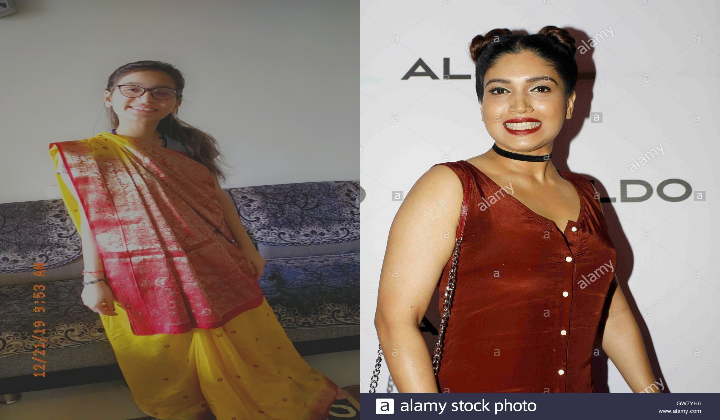

In [ ]:
#@title Default title text
from google.colab.patches import cv2_imshow

img_concate_Hori=np.concatenate((test_img,celeb_img),axis=1)
cv2_imshow(img_concate_Hori)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()